# Module 2 - Data collection, validation and privacy


### Assignment overview

In this assignment, you will be exploring various aspects related to collecting data and identifying bias in datasets. You will also be asked to consider issues of data privacy and governance.

For this assignment, it is possible to work in **groups of up to 2 students**. 

### Group members
Leave blanks if group has less than 2 members:
- Student 1: Ayuho Negishi
- Student 2: Muhan Yang

### Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
1. Discuss the implications of data governance and data ownership in data science  
2. Argue the advantages and disadvantages of collecting individuals’ data online  
3. Distinguish between a sample and a population, what attributes make a representative sample and the possible ethical implications of a non-representative sample  
4. Explain the elements of experimental design 
5. Identify possible sources of bias in datasets (such as historical, measurement, and representation bias) 
6. Describe the ethical implications of variable choice in data science (e.g., use of proxies, use of gender and race as variables) 
7. Apply good practices for minimizing errors in data cleaning  
8. Apply methods for improving privacy and anonymity in stored data and data analysis, such as k-anonymity and randomized response 
9. Explain the notion of differential privacy 


# Part 1: Data collection, sampling and bias

In class, we discussed different sources of bias that can affect the data we want to use for our Data Science applications. Here is a summary:

### 1. Historical bias
**Historical bias:** bias that exists in society and is reflected in the data. It is the most insidious because it arises even if we are able to perfectly sample from the existing population. Most often, it affects groups that are historically disadvantaged.

E.g. In 2018, 5% of Fortune 500 CEOs were women. Historically, women have less frequently made it to a CEO position. A classifier trained to predict the best choice for a new CEO may learn this pattern and determine that being a woman makes one less qualified to be a CEO.

### 2. Representation bias
**Representation bias:** the sample underrepresents part(s) of the population and fails to generalize well. This may happen for different reasons:

1. The sampling methods only reached a portion of the population. E.g. Data collected via smartphone apps can under-represent lower incomes or older groups, who may be less likely to own smartphones.

2. The population of interest has changed or is distinct from the sample used during model training. E.g. Data that is representative of Vancouver may not be representative if used to analyze the population in Toronto. Similarly, data representative of Vancouver 100 years ago may not reflect today's population. 

### 3. Measurement bias
**Measurement bias:** it occurs when choosing features that fail to correctly represent the problem, or when there are issues with the data collection. Fore example:

1. The measurement processes varies across groups. E.g. one group of workers is monitored more closely and thus more errors are observed in that group.

2. The quality of data varies across groups. E.g. women often self-report less pain than men and are therefore less likely to receive certain diagnoses

3. The defined classification task or one of the features used is an oversimplification. E.g. We are designing a model to predict whether a student will be successful in college. We choose to predict the final GPA as metric of success. This, however, ignores other indicators of success.

**Question 1** 

Consider a crowd-sourcing project called [Street Bump](https://www.boston.gov/transportation/street-bump) aimed at helping improve neighbourhood streets in Boston from 2011 to 2014. Volunteers used a smartphone app, which captured GPS location and reported back to the city everytime the driver hit a pothole. The data was provided to governments so they could use the data to fix any road issues.

Can you think of any sources of bias in the scenario above? Explain them. 

**Measurement Bias**
- Potholes on less-travelled roads can be overlooked. Street Bump collects data based on cars driving over potholes. Roads with low traffic may not have enough data collected, meaning potholes on roads with low traffic may go unnoticed. This could lead to an unequal allocation of repair resources, leaving smaller or less-travelled roads unrepaired.

**Representation Bias**
- Only smartphone users can participate in this project. The project relies on smartphone users, which may exclude groups like low-income individuals or older adults who are less likely to own smartphones. This results in an underrepresentation of these groups and their neighbourhoods, as road issues affecting these groups might not be reported.
- There might be different perceptions of road issues. For instance, wealthier participants might perceive even minor road bumps as significant issues due to higher expectations for road quality or the use of more sensitive vehicles. As a result, minor issues in wealthier neighbourhoods could be overreported, while more serious matters in poorer neighbourhoods might be underreported.

## Observational and experimental studies

- **Observational study:** study where there is no deliberate human intervention regarding the variable under investigation. Observational studies are ones where researchers observe the effect of a treatment/intervention without trying to change who is or isn’t exposed to it. In an observational study, the subjects are assigned or assign themselves to the exposure group they belong to.
- **Experimental study:** : study that involves planned intervention on the exposure to a condition. In an experiment, subjects are assigned to a condition by the researcher and thus one can establish a cause-and-effect relationship when we see a difference in the outcome between the experimental groups. Randomizing study subjects balances any differences between treatment groups with respect to all variables except the condition of exposure.

## A/B testing

A/B testing can be considered the most basic kind of randomized controlled experiment. 

Complete the following reading, then answer the comprehension questions below: https://hbr.org/2017/06/a-refresher-on-ab-testing

**Question 2**

In the following table, select which statements are true or false:

| Statement | True | False |
| -------- | :------- | :------- |
| A/B testing is an example of experimental study. |    x    |        | 
| Observational studies require subjects to not be informed that they are being studied. |        |    x    |  
| Ethical experimental studies require genuine uncertainty about the benefits/harms of treatment or exposure (equipoise) |    x    |        | 
| A researcher is interested in studying the effects of certain dietary habits. They recruite people and, through a survey, they ask them to disclose their current dietary habits, on which bases they will be assigned to treatment or control group. This is an example of experimantal study. |        |    x    | 
| The control group and the exposed group must include different individuals. |        |    x    | 
| One of the main advantages of experimental studies is that they allow for better randomization. |    x    |        | 



**Question 3**

Explain the role of blocking in A/B testing.

The role of blocking in A/B testing is to reduce differences and ensure fair comparisons between groups, leading to more accurate and clear results. It works by grouping subjects with similar characteristics (e.g., mobile vs. desktop users) into "blocks" before randomly assigning them to either the A or B condition. This approach ensures that any observed differences in the outcome are more likely due to the variable being tested rather than unrelated factors.

**Question 4**

The authors warn about observing too many metrics when running an A/B test. Why is that the case? What could happen if I ignore this warning?

**Why is that the case?**
- Observing too many metrics during an A/B test may increase the chance of finding patterns that aren’t actually meaningful. These patterns, known as "spurious correlations", are often just random fluctuations in the data. When you track a large number of metrics, it becomes harder to tell what changes are truly important and what is just noise.

**What could happen if I ignore this warning?**
- You may end up drawing the wrong conclusions, thinking that a random fluctuation is an actual result.
- You might make decisions based on misleading results, wasting time and resources or making changes that don’t actually improve outcomes.


**Question 5** 

You want to determine the size of the subscribe button on your website. You plan to evaluate the performance by the number of visitors who click on the button. To run the test, you show one set of users one version and collect information about the number of visitors who click on the button. One month later you show users another version where the only thing different is the size of the button. Based on this test, you determine that the second version had a higher number of visitors who clicked on the button. Can you conclude that this version of the website leads to a higher number of visitors clicking on the button? Briefly explain.  

No, you cannot conclude that the second version of the website leads to a higher number of visitors clicking on the button.
Although the prompt states that the "only thing different is the size of the button," there is a measurement bias because the data was collected at different times (one month apart). Many other external factors could have influenced the number of clicks.
For example, if an influencer or YouTuber shared the website after the first month, this could have increased the number of visitors and clicks in the second month. 
Therefore, the observed difference in performance may not be entirely due to the difference in button size.

### Ethical A/B testing
Ethical A/B testing still requires all the ethical considerations of any experimental study, such as informed consent or possibility to opt out. A notorious case of a company failing to meet ethics requirement in A/B testing is the infamous Facebook "social contagion experiment", in which almost 700,000 users were showed, for a week, only positive or only negative content, to see how this variation impacted their online behaviour. The selected users were not informed and could not opt out. Furthermore, their emotional state was affected. Facebook defended itself by saying that Facebook's Data Use Policy warns users that Facebook “may use the information we receive about you…for internal operations, including troubleshooting, data analysis, testing, research and service improvement”. This defense was largely rejected by the scientific community, which still considered the study as unethical. You can read more about this incident in this [article](https://www.theguardian.com/technology/2014/jun/30/facebook-emotion-study-breached-ethical-guidelines-researchers-say). 

## Case Study: National Institute of Justice's (NIJ) Recidivism Dataset 

We will now look at the NIJ's Recidivism data set, which contains data on 26,000 individuals from the State of Georgia released from prison on parole (early release from prison where the person agrees to abide by certain conditions) between January 1, 2013 and December 31, 2015. **Recidivism** is the act of committing another crime.

This dataset is split into two sets, training and test, 70% of the data is in the training dataset and 30% in the test dataset. The training set contains four variables that measure recidivism: whether an individual recidivated within three years of the supervision start date and whether they recidivated in year 1, year 2, or year 3. In this data set, recidivism is defined as being arrested for a new crime during this three-year period. The test set does not include these four variables. 

The data was provided by the Georgia Department of Community Supervision (GDCS) and the Georgia Bureau of Investigation.

*Source: https://data.ojp.usdoj.gov/stories/s/daxx-hznc*

Let's start by familiarizing with the [dataset source](https://nij.ojp.gov/funding/recidivism-forecasting-challenge). The website includes a lot of information on the dataset and a detailed description of each of its columns (look for Appendix 2: Codebook).



**Question 6**
Think about how the data set was collected and what we are trying to predict. Are there any potential sources of bias (historical, representation, measurement)? Explain your answer. 

*We are trying to predict whether an individual will commit a crime (i.e., recidivate) within three years after they are released from the prison, as the trianing set data contains variables that measures recidivism after being released.*
*There might be historical bias and representation bias.*

***Historical bias:** even though the classifier is balanced, because of the racial bias within the society, the model is more likely to predict a black people to recidivate compared to a white people.*

***Representation bias:** the dataset only considered black and white in the `Race` column and male and female in the `Gender` column, but there are other racial groups as well. And therefore the sample selected in the dataset is not a good representation of the population - individuals from the State of Georgia released from prison on parole.*

### Question 7: Exploratory Data Analysis (EDA)

We are now going to perform some Exploratory Data Analysis on the NIJ's Recidivism Training set. This will serve 2 purposes:
- it will help us familiarize with the dataset
- it will help us spot possible imbalances or sources of bias in the dataset

You are free to use tools and functions of your choice to complete the EDA. Your goal is to answer the following questions:
1. Does the dataset include protected characteristics? We recommend using the [BC Human Rights Code](http://www.bchrt.bc.ca/human-rights-duties/characteristics.htm) for reference.
2. If the dataset includes protected characteristic, do you think they are necessary to perform the predictive task? Why or why not?
3. If we were to remove the columns including protected characteristics, do you think it would still be possible to retrieve that information through other features (proxies)? Explain how.
4. Is the target variable balanced? If not, what could happen?
5. Is the target variable balanced *across protected segments of the population?* What could happen if this is not the case? 
6. Are there features with missing values? Do you suspect that they may be Missing Not At Random (MNAR), and if so, how would it be best to fill this information?

**Notes:**
- Bar charts and other plots are helpful to visually spot imbalances
- You are encouraged to talk to the instructor and TA to discuss your EDA strategy and if you need suggestions with the code

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000)
df = pd.read_csv("NIJ_s_Recidivism_Challenge_Training_Dataset.csv")
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,True,False,3 or more,2,True,1,2 or more,False,True,False,False,False,True,True,False,False,True,False,True,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,6 or more,0,3,3,3,False,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,False,True,True,True,False,False,False,False,False,0,6,0,3 or more,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,3 or more,2,1,3,True,False,1,0,True,0,1,False,False,False,False,False,True,True,True,False,False,False,False,0,7,0,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False


In [72]:
df.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      2217
Supervision_Risk_Score_First                          330
Supervision_Level_First                              1212
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       2321
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

In [76]:
df_NAs = df[df.isnull().any(axis=1)]
df_NAs

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
5,7,M,BLACK,48 or older,18,False,2.0,Standard,Less than HS diploma,2,NaN,Less than 1 year,10 or more,6 or more,1,5 or more,1,5 or more,False,True,3 or more,1,False,3 or more,0,True,False,True,False,False,False,False,False,False,False,False,False,0,0,0,1,238.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,False,True,False,False,True
6,9,F,BLACK,43-47,5,NaN,7.0,High,High School Diploma,0,Drug,Less than 1 year,10 or more,4,2,5 or more,3,3,False,False,2,4 or more,False,3 or more,2 or more,True,False,False,False,True,True,False,False,False,False,False,False,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,True,True,True,False,False
9,13,M,WHITE,48 or older,18,False,3.0,Standard,Less than HS diploma,1,Property,More than 3 years,8,4,0,5 or more,2,1,False,False,1,0,False,2,1,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,NaN,0.0,0.0,0.016055,0.002294,0.000000,NaN,False,False,False,False,False
10,14,M,BLACK,33-37,3,True,7.0,NaN,High School Diploma,0,Drug,1-2 years,10 or more,3,1,1,5 or more,5 or more,False,False,0,1,True,1,2 or more,False,False,False,False,False,True,False,True,False,False,False,False,0,10 or more,0,1,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,False,True,True,False,False
12,18,M,WHITE,43-47,24,False,1.0,Standard,High School Diploma,3 or more,Property,Less than 1 year,10 or more,6 or more,0,5 or more,0,5 or more,True,True,3 or more,2,False,3 or more,0,True,False,False,True,False,True,False,False,False,False,False,False,0,0,0,2,NaN,NaN,NaN,NaN,NaN,0.452138,0.743890,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,NaN,More than 3 years,2,2,2,0,0,0,True,False,0,2,True,0,0,False,True,False,False,False,False,False,False,False,False,False,False,0,6,0,0,127.700000,0.0,0.0,0.000000,0.000000,0.189507,0.572044,False,True,True,False,False
18024,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,NaN,More than 3 years,0,2,0,0,0,0,False,False,0,2,False,0,0,False,False,False,False,False,False,False,False,False,False,False,False,0,10 or more,0,0,42.266667,0.0,0.0,0.000000,0.000000,0.757098,0.576104,False,True,False,True,False
18025,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,NaN,More than 3 years,0,0,0,0,0,0,False,False,0,0,False,0,0,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.711138,0.894125,False,True,False,True,False
18026,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some colleg

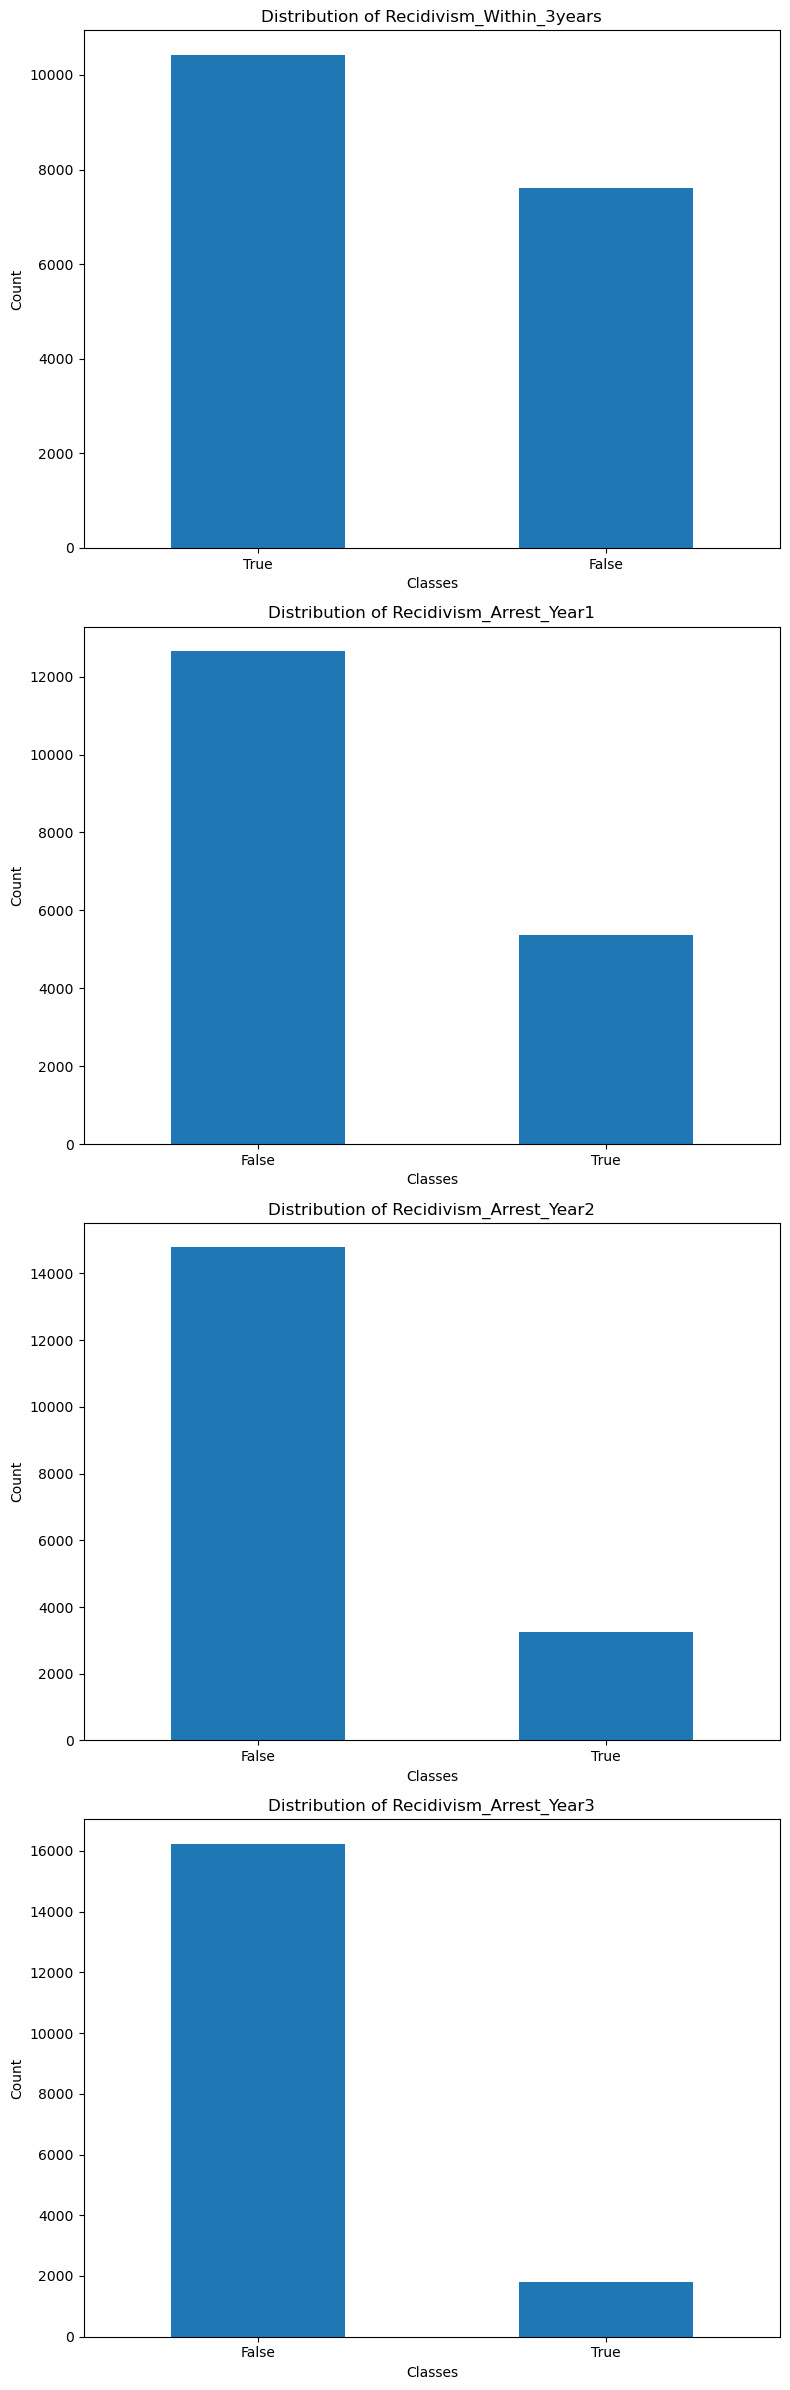

In [79]:
target_variables = ['Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2' ,'Recidivism_Arrest_Year3']

# Set up a grid for multiple bar charts (1 row for each target)
fig, axes = plt.subplots(nrows=len(target_variables), figsize=(8, 6*len(target_variables)))

if len(target_variables) == 1:
    axes = [axes]

# Loop over target variables to plot each one
for i, target in enumerate(target_variables):
    value_counts = df[target].value_counts()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {target}')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

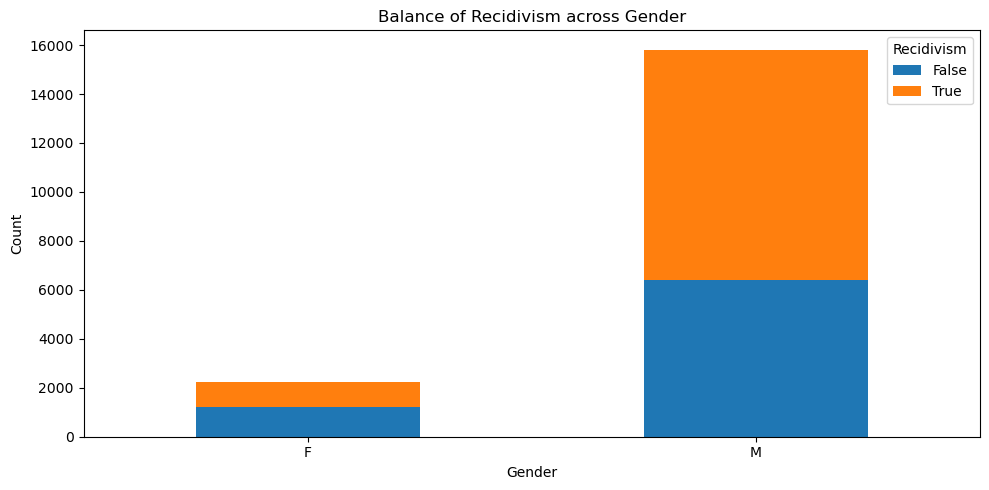

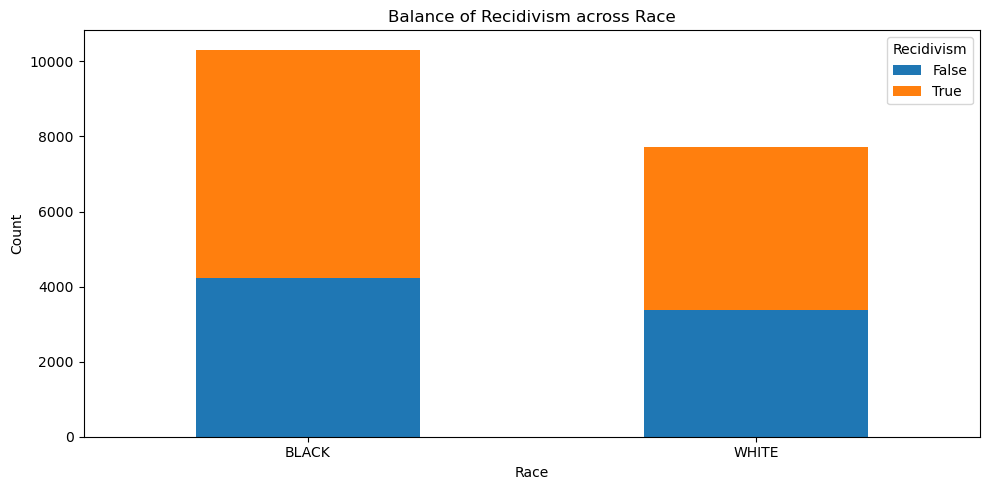

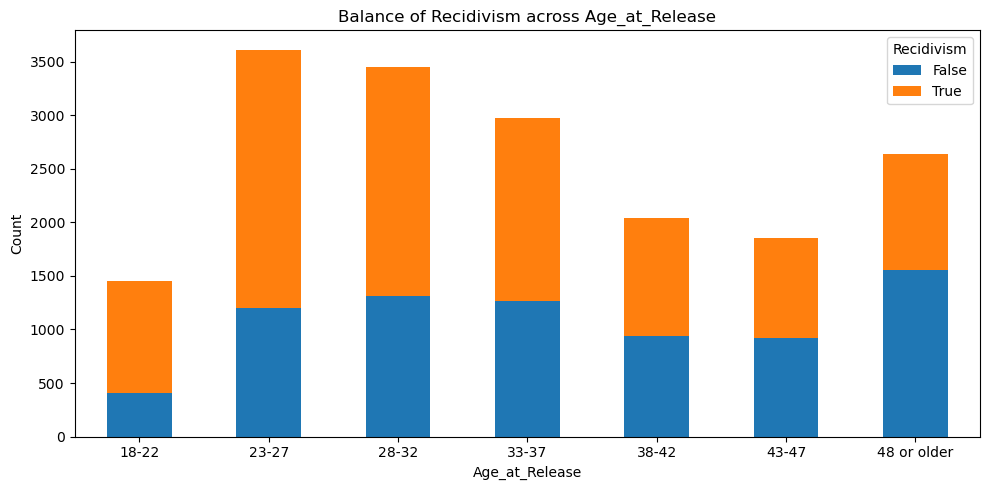

In [78]:
# Select columns
cols = ['Gender', 'Race', 'Age_at_Release']

# Loop through each segment and create a bar chart
for col in cols:
    # Group by the current segment and the target variable
    counts = df.groupby([col, 'Recidivism_Within_3years']).size().unstack()
    
    # Create the bar chart
    counts.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Balance of Recidivism across {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Recidivism')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

1. Yes. It includes gender, race, age groups, and number of dependents at prison entry.

2. No. We don't think they are necessary to perform the predictive task, as our target variable Recidivism, defined as being arrested for a new crime during this three-year period, can be measured from four dimensions: whether an individual recidivated within three years of the supervision start date and whether they recidivated in year 1, year 2, or year 3. None of the four aspects require demographic information from the protected characteristics and such characteristics are also not at all related to recidivism.

3. No. The rest columns were mostly about the individual's supervison in prison, criminal history, and recidivism, and it has nothing to do with demographic information and personal characteristics like age, gender, race, and so on.

4. No. The target variable is slightly imbalanced according to the bar charts, with the group around 7,000 pieces of data and the other about 10,000. This might lead to an overfitting for the out-numbered group and underfitting for the under-numbered group, as the model tries to minimize the overall error.

5. No. According to the bar graphs above, it is not balanced across different age, gender, and race groups. This might result in bias in the predictive model, as it might overfit the majority group and underfit the underrepresented ones, leading to poor predictive performance for those minor groups in the data. It may also cause fairness issue in data science, as it may over-predict one group (with the majority numbers in the training set) over others, leading to discrimination.

6. Yes. I think they may be MNAR, as there is no noticeable patterns between the missing data and columns with responses from other columns. we can use the imputation method in machine learning to deal with the missing data.

# Part 2: Privacy



When collecting data for a study, privacy is almost always a primary concern. Our data set may include information that makes it possible to identify an individual, including:

- **Direct identifiers**, which are the ones that can be used to uniquely identify an individual or a household in a dataset, such as a record ID number, patient number, social insurance number, full address, etc. Usually, name is also considered a direct identifier (although several people can have the same name). Other features such as age, date of birth, or postal code are not sufficient on their own to uniquely identify an individual and would not be considered direct identifiers.
- **Indirect (or quasi) identifiers**, which are the columns that do not themselves identify any individual or household, but can do so when combined with other indirect-identifiers. For example, postal code and date of birth are often indirect identifiers, because it is very likely that within a zip code only one individual has this particular birth date. The more indirect identifiers that you have, the more likely it is that individuals become identifiable because there are more possible unique combinations of identifying features.

### Question 8
1. Which columns in the NIJ dataset are direct identifiers? Briefly motivate your answer.
2. Which of the remaining columns make good candidates for indirect identifiers? Which ones do not?

Hint: It can be useful to use the `nunique()` and `value_counts()` dataframe methods to get an idea of how many distinct values a feature has.


In [36]:
df.nunique()

ID                                                   18028
Gender                                                   2
Race                                                     2
Age_at_Release                                           7
Residence_PUMA                                          25
Gang_Affiliated                                          2
Supervision_Risk_Score_First                            10
Supervision_Level_First                                  3
Education_Level                                          3
Dependents                                               4
Prison_Offense                                           5
Prison_Years                                             4
Prior_Arrest_Episodes_Felony                            11
Prior_Arrest_Episodes_Misd                               7
Prior_Arrest_Episodes_Violent                            4
Prior_Arrest_Episodes_Property                           6
Prior_Arrest_Episodes_Drug                              

In [37]:
for column in df.columns:
    print(df[column].value_counts())

ID
1        1
17825    1
17834    1
17833    1
17832    1
        ..
8931     1
8933     1
8935     1
8937     1
26761    1
Name: count, Length: 18028, dtype: int64
Gender
M    15811
F     2217
Name: count, dtype: int64
Race
BLACK    10313
WHITE     7715
Name: count, dtype: int64
Age_at_Release
23-27          3611
28-32          3449
33-37          2975
48 or older    2641
38-42          2040
43-47          1858
18-22          1454
Name: count, dtype: int64
Residence_PUMA
8     1197
17    1193
4     1142
3      941
14     930
20     881
7      819
6      811
5      791
12     777
2      766
11     749
19     736
16     729
18     705
25     673
22     630
24     610
1      572
15     502
21     478
9      447
10     413
23     342
13     194
Name: count, dtype: int64
Gang_Affiliated
False    13030
True      2781
Name: count, dtype: int64
Supervision_Risk_Score_First
6.0     2677
7.0     2522
5.0     2433
8.0     2008
4.0     1985
9.0     1747
10.0    1520
3.0     1457
2.0      806
1.0 

1. The **direct identifier** in this dataset would be the `ID` column, as it is the unique person ID that each individual has and there are no individuals sharing the same ID.

2. The good candidate of **indirect (quasi) identifiers** in this dataset could be `Avg_Days_per_DrugTest` (Average Days on Parole Between Drug Tests) and several columns of % Drug Tests Positive for different kinds of drugs or `Percent_Days_Employed` (% Days Employed While on Parole), and `Jobs_Per_Year` (Jobs Per Year While on Parole). These columns also contain a fairly decent numbers of unique values, meaning that the likelihood that multiple individuals sharing the same value is low, and in that way we could identify an individual using multiple identifiers. Some poor candidate for it would be the protected characteristics (i.e. demographic columns mentioned before), different types of violations during the parole supervision episode, arrest and conviction episodes prior to the prison entry.

## De-identification of structured data

To safeguard the privacy of the individuals in our dataset, we need to make sure that they are not identifiable, either directly or indirectly. There are three main strategies to achieve this: suppression, pseudonymization, and generalization.

### Suppression
Suppression is an effective way to get rid of a direct identifier by simply removing the entire column. 

**Question 9:** using the appropriate dataframe methods, suppress all direct identifier in the NIJ training set. Save the result in a new dataframe called `suppressed_df`

In [38]:
direct_identifier = ['ID']
suppressed_df = df.drop(columns=direct_identifier)
suppressed_df.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,True,False,3 or more,2,True,1,2 or more,False,True,False,False,False,True,True,False,False,True,False,True,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,6 or more,0,3,3,3,False,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,False,True,True,True,False,False,False,False,False,0,6,0,3 or more,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,3 or more,2,1,3,True,False,1,0,True,0,1,False,False,False,False,False,True,True,True,False,False,False,False,0,7,0,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False


### Pseudonymization

A big issue with suppression of direct identifier is that it is not reversible. If at some point we need to identify an individual in our dataset, we would be out of luck. If you have reasons to believe that re-identification may be required, pseudonymization would be a better option to handle direct identifiers. Pseudonymization replaces one or more direct identifiers with a unique but less meaningful value. Usually when we pseudonymize an identifier, there is a possibility of re-identification if required (but it would not be available to the general public).

**Question 10:** pseudomyze the ID column of the NIJ training set and save the result in a new dataframe called `pseudo_df`. In a different code cell, show that it is possible to re-identify the samples by converting them back to the original ID number.

There are different ways to achieve this you may want to explore:
- Write your own pseudonymization function. You should write at least 2 functions: one to pseudomyze, and another to re-identify. The function does not have to be exceedingly complex but it should not be obvious either (e.g. only basic arithmetic involved).
- Use an extisting library, such as [`cryptography`](https://cryptography.io/en/latest/).

In [46]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Pseudonymize using encryption
def encrypt_id(id, cipher):
    return id.apply(lambda x: cipher.encrypt(str(x).encode()).decode())

# Re-identify using decryption
def decrypt_id(pseudo_id, cipher):
    return pseudo_id.apply(lambda x: cipher.decrypt(x.encode()).decode())

# Pseudonymize the ID column
pseudo_df = df.copy()
pseudo_df['Pseudo_ID'] = encrypt_id(df['ID'], cipher_suite)
pseudo_df.drop(columns = ['ID']).head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Pseudo_ID
0,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,gAAAAABm9NVVuqL47VU4serG5QlJvjvh-hBs4pF0QbXAvd...
1,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,gAAAAABm9NVVg9REkG6XPtOyv0NroBaPk9T6joOoOqYqWt...
2,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,True,False,3 or more,2,True,1,2 or more,False,True,False,False,False,True,True,False,False,True,False,True,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,gAAAAABm9NVVxss0hZ786ExaNS76gp4W6p11tkZZDfRkWP...
3,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,1-2 years,8,6 or more,0,3,3,3,False,False,3 or more,4 or more,False,3 or more,2 or more,False,False,False,False,True,True,True,False,False,False,False,False,0,6,0,3 or more,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,gAAAAABm9NVVbSyCOIN2KrmNLk0fysOJZCRs-1MfzEZq9B...
4,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,4,4,3 or more,2,1,3,True,False,1,0,True,0,1,False,False,False,False,False,True,True,True,False,False,False,False,0,7,0,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,gAAAAABm9NVVEZFrXqwDOwXKczJ94-yx92B6LYUqnuCvaK...


### Generalization

Generalization is a commonly used technique in anonymization, which involves reducing the precision of a column. For example, the date of birth or the date of a doctor's visit can be generalized to a month and year, to a year, or to a five-year interval. Generalization can help achieving $k$-anonymity. 

To check for $k$-anonymity, we will use the [`pycanon` library](https://github.com/IFCA/pycanon). You can install this library in your virtual environment by running the command:

```
pip install pycanon
```

**Question 11:** `pycanon` includes several functions (feel free to explore them in the related documentation), but we will only be using `k-anonimity`. Look at the documentation, then use `k-anonimity` to determine the $k$-anonymity of the following groups of variables:

- $k$-anonymity of Gender and Race features: ?
- $k$-anonymity of Gender, Race, and Age_at_Release features: ?
- $k$-anonymity of Gender, Race, Age_at_Release and Residence_PUMA features: ?

In [48]:
from pycanon import anonymity

# Calculate k for k-anonymity:
k_gender_race = anonymity.k_anonymity(df, ["Gender", "Race"])
k_gender_race_age = anonymity.k_anonymity(df, ["Gender", "Race", "Age_at_Release"])
k_gender_race_age_residence = anonymity.k_anonymity(df, ["Gender", "Race", "Age_at_Release", "Residence_PUMA"])
print(k_gender_race)
print(k_gender_race_age)
print(k_gender_race_age_residence)

743
44
1


The $k$-anonymity of the combination of Gender, Race, Age_at_Release and Residence_PUMA is clearly problematic! It would be very easy to identify someone if we knew these 4 pieces of information about them. 

**Question 12:** can you bin the Residence_PUMA feature to achieve 4-anonymity for this set of features? Add the new column to the existing dataframe, using the name `Binned_PUMA`.

For this task, you may want to look into the `cut()` and `qcut()` functions of the pandas library.

Remember that now, when checking for $k$-anonymity, you should be looking at the new column `Binned_PUMA`, not at `Residence_PUMA`.

In [55]:
# Check unique values in Residence_PUMA column
df['Residence_PUMA'].unique()
# Split the data in Residence_PUMA column into quantiles or percentiles
df['Binned_PUMA'] = pd.qcut(df['Residence_PUMA'], q=5, labels=False)
k_gender_race_age_residence = anonymity.k_anonymity(df, ["Gender", "Race", "Age_at_Release", "Binned_PUMA"])
print(k_gender_race_age_residence)

4


With 4-anonymity for these set of features, we can rest assured that there are at least 4 individuals sharing the same combination, making it more difficult to identify someone by knowing only these 4 pieces of information. However, let's not ignore the following issues:
- We did not test $k$-anonymity for other combinations of features, so it is very likely that our dataset is still not anonymized.
- 4-anonymity is not very strong; if I can narrow down my search to 4 people, I can still learn a lot about a person (at least approximatively).
- We may lose $k$-anonymity by adding more information.

## Differential Privacy

As discussed in class, differential privacy is a stronger, mathematically robust definition of privacy for an algorithm. You can learn more about it by watching this video from Minute Physics: [Protecting Privacy with MATH](https://www.youtube.com/watch?v=pT19VwBAqKA)

After watching this video, try answering the following questions:
1. If you have two differentially private datasets, one with and one without your data, what does differential privacy guarantee regarding your privacy?
2. An algorithm has differential privacy $\epsilon$ = 2, another one $\epsilon$ = 4. Which one provides a higher level of privacy? Explain your answer.
3. The video highlights at least two of the main challenges with differential privacy. Summarize them.

1. Differential privacy guarantees that the outcome of any analysis or results based on the dataset will be statistically similar, whether or not your data is included. This makes it difficult for anyone to determine if your specific data was part of the dataset because the output will not change significantly based on the inclusion or exclusion of any one person's data, protecting your privacy.

2. The algorithm with 𝜖 = 2 provides a higher level of privacy. The parameter 𝜖  in differential privacy measures the level of privacy loss (the smaller the value of 𝜖, the stronger the privacy protection). This is because a lower 𝜖 means the algorithm’s results are less affected by the presence or absence of any single individual's data.

3. 
-  When the dataset is used multiple times to get different pieces of information, privacy loss can accumulate. Therefore, the more the data is used, the greater the risk to individual privacy. It is important to manage how much information is released to avoid exceeding the "privacy budget."
- Another challenge highlighted in the video is a trade-off between privacy and accuracy. To increase privacy, random noise is added to the data, which can reduce accuracy. The challenge is to find the right balance where the data remains useful while still protecting privacy.


## Randomized response

In class, we described randomized polling as a way to conduct interviews including sensitive questions, while protecting individuals' privacy. 

**Question 13:** imagine that UBC has been surveying students to understand how many of them have been cheating in a final exam. Because the information is very sensitive and students will most likely not want to share this information, they use the randomized polling protocol described in class. If 1000 students have been surveyed, and 300 of them responded "yes", what is the actual percentage of students who cheated in a final?

x * 3/4 + (1-x) * 1/4 = 30/1000

x = 0.1

10%.

# Part 3: Data Governance 

Data governance refers to the set of policies, procedures and standards that companies and organization must adopt to ensure quality, sacurity and usability of the data in their possession. 

To gain a better understanding of what data governance is, why it is important and what common mistakes affect it, please read the following articles:
- https://www.egnyte.com/guides/governance/data-ownership
- https://atlan.com/data-governance-mistakes/#what-is-data-governance

As you can see, the issue of data governance is complex and multifaceted. A group of experts with a variety of experties is necessary to design and implement a robust data governance plan. Still, we can train ourselves to spot the most common mistakes when we see them. Take, for example, the following fictitional scenario (co-authored in collaboration with [ChatGPT](https://chat.openai.com/))

"SleekTech Solutions" is a cutting-edge technology company specializes in technologies related to artificial intelligence and data analytics. Their services include data analytics, big data processing, cloud computing, and Internet of Things (IoT). They offer their services to various industries, such as healthcare, finance, retail, manufacturing.

The company is young, only founded in 2021, and has rapidly expanded. At their inception, they used to accumulate data in a vast digital repository known as the "Data Lake." Initially, this seemed like a cost-effective solution to store all types of data, and they have not changed this strategy to this date. 

To increase agility, SleekTech's different divisions have significant autonomy over their data. This means that the same data may be recorded by different department using different standards and metrics. SleekTech also encourages a culture of openness. Employees have access to vast amounts of data, including sensitive customer information, to complete the tasks they are assigned to.

SleekTech has been expanding rapidly. Founded in Canada, is now looking to expand into new markets including US and Europe.

**Question 14:** using the readings as reference, outline at least 4 distinct mistakes that SleekTech Solutions is likely to commit because of their data governance strategy. 


1. **Neglecting Data Quality**:
Since "the same data may be recorded by different departments using different standards and metrics," there is a risk of data duplication and inconsistencies. This can result in a lack of data standardization, ultimately leading to poor data quality. Such redundancy wastes resources, as more time and effort are required to clean and manage the data, which affects the overall reliability and usability of the information.

2. **Lack of Clear Ownership and Accountability**:
The decentralized approach of allowing different departments to manage their own data without standard guidelines makes it difficult to identify who is responsible for the data. This creates a "lack of clear ownership and accountability", as no single team is held accountable for maintaining data quality, security, and compliance. As a result, it is challenging to ensure that data governance policies are followed across the organization.

3. **Ignoring Privacy and Security**:
With a culture that promotes openness, "employees have access to vast amounts of data, including sensitive customer information." This unrestricted access makes it difficult to perform regular audits or enforce privacy standards. Without proper access controls, SleekTech faces the risk of data breaches and unauthorized use of sensitive customer data. Strong privacy policies, regular audits, and clear access guidelines are necessary to mitigate such risks.

4. **Failing to Evolve and Adapt**:
SleekTech is "expanding rapidly" into new markets, including the US and Europe. Their data governance may struggle to keep up with changing business needs, international privacy regulations, and evolving best practices in data management. This inability to adapt to new regulatory and market demands increases the risk of compliance issues, security vulnerabilities, and operational inefficiencies. It is crucial to review and update the data governance framework regularly to remain effective and compliant.

# Final thoughts

1) If you have completed this assignment in a group, please write a detailed description of how you divided the work and how you helped each other completing it:

- Ayuho was responsible for questions 1 to 5 (question 2 was covered in class), as well as question 12 on Differential Privacy, and question 14. Muhan completed all the remaining questions. We both reviewed each other's answers and provided cross-checks.

2) Have you used ChatGPT or a similar Large Language Model (LLM) to complete this homework? Please describe how you used the tool. **We will never deduct points for using LLMs for completing homework assignments,** but this helps us understand how you are using the tool and advise you in case we believe you are using it incorrectly.

- We used it to generate a starting code template for the pseudonymization question.

3) Have you struggled with some parts (or all) of this homework? Do you have pending questions you would like to ask? Write them down here!

- Yes. We are still slightly confused on the randomized poll protocol. The result seems a bit counter-intuitive - why there will be fewer number of people actually cheat compared to those who said they cheated in the poll? I feel like in real life there would be more people actually cheat compared to the poll result, as people don't want others to know they are cheating.